# Exploratory Data Analysis (Formatted Zone)
Filtering approaches and time series generation

In [1]:
from database_settings import postgres_utilities
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Seaborn setup
sns.set_style("darkgrid")

## Explore filtering approaches

In [3]:
# Establish the connection with the Persistent Zone
engine = postgres_utilities.engine()

Connected to Formatted Zone successfully!


In [4]:
# See the distribution of rows with respect to boarding_date
exports_year = postgres_utilities.run_query_file(engine, './queries/boarding_date_year.sql')
exports_year = pd.DataFrame(exports_year).sort_values(by='year', ascending=True)
exports_year

,year,count,proportion
9,2010,1,0.0001
11,2011,8,0.0005
2,2013,48,0.0033
5,2014,287,0.0195
7,2015,639,0.0433
3,2016,30207,2.0482
1,2017,165630,11.2306
4,2018,203699,13.8119
10,2019,213815,14.4978
6,2020,210064,14.2435


In [5]:
# Defining the filters
# net weight: See the percentage of data kept if you set a filter based on the net weight
net_weight_threshold = 100
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/net_weight_filter_definition.sql',
                                           params={'net_weight_threshold': net_weight_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("Net weight: By removing those exports with a net weight of less than {}kg, we keep {}% of the data.".format(net_weight_threshold, proportion))

# value_usd: See the percentage of data kept if you set a filter based on the usd_value
value_usd_threshold = 200
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/value_usd_filter_definition.sql',
                                           params={'value_usd_threshold': value_usd_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("Usd value: By removing those exports with a value of less than ${}, we keep {}% of the data.".format(value_usd_threshold, proportion))

# heading: See the percentage and count of data kept if you set a filter based on the count of headings
headings_count_threshold = 100
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/headings_count_filter_definition_1.sql',
                                           params={'headings_count_threshold': headings_count_threshold})
proportion = round(float(proportion[0][0])*100,2)
count = postgres_utilities.run_query_file(engine,
                                           './queries/headings_count_filter_definition_2.sql',
                                           params={'headings_count_threshold': headings_count_threshold})
print("Heading: By removing those exports whose heading's count is less than {}, we keep {}% of the data. That is {} from {} headings.".format(headings_count_threshold, proportion, count[0][0], count[0][1]))


# boarding_date: See the percentage of data kept if you set a filter based on the boarding_date
year_threshold = 2017
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/boarding_date_filter_definition.sql',
                                           params={'year_threshold': year_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("Boarding date: By removing those exports with a boarding date before {}, we keep {}% of the data.".format(year_threshold, proportion))

Net weight: By removing those exports with a net weight of less than 100kg, we keep 96.72% of the data.
Usd value: By removing those exports with a value of less than $200, we keep 96.83% of the data.
Heading: By removing those exports whose heading's count is less than 100, we keep 99.89% of the data. That is 100 from 169 headings.
Boarding date: By removing those exports with a boarding date before 2017, we keep 97.89% of the data.


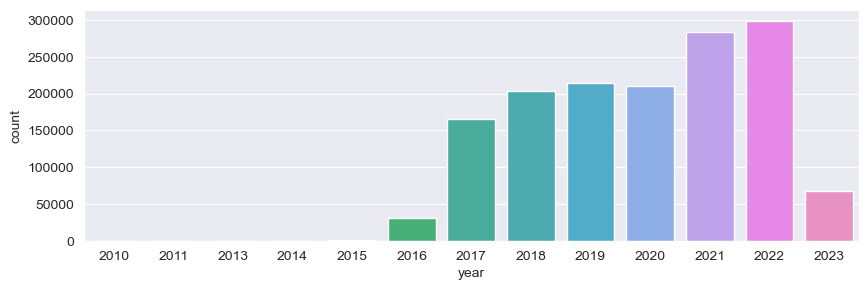

In [6]:
# Bar chart
plt.figure(figsize=(10,3))
sns.barplot(x='year', y='count', data=exports_year)
plt.show()

In [7]:
# Get the data after all the filters
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/filtered_data_definition.sql',
                                           params={'year_threshold': year_threshold,
                                                   'headings_count_threshold': headings_count_threshold,
                                                   'value_usd_threshold': value_usd_threshold,
                                                   'net_weight_threshold': net_weight_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("All filters: By applying all filtering approaches we keep {}% of the data.".format(proportion))

All filters: By applying all filtering approaches we keep 94.15% of the data.


## Get a heading's time series

In [8]:
# Get the filtered data
result = postgres_utilities.run_query_file(engine,
                                           './queries/heading_data.sql',
                                           params={'year_threshold': year_threshold,
                                                   'headings_count_threshold': headings_count_threshold,
                                                   'value_usd_threshold': value_usd_threshold,
                                                   'net_weight_threshold': net_weight_threshold})
df = pd.DataFrame(result)
df

,heading,description,details,exporter_id,net_weight,gross_weight,value_usd,country,boarding_date,batch_week
0,0709200000,Espárragos frescos o refrigerados,ESPARRAGOS FRESCOS SE ACOGE A DRAWBACK D.S...,20201146497,2300.000,2752.000,13027.600,NL,2017-01-01,02080117
1,0709200000,Espárragos frescos o refrigerados,ESPARRAGO FRESCO EN CAJAS DRAWBACK,20201146497,1900.000,2098.000,5035.000,US,2017-01-01,02080117
2,0709200000,Espárragos frescos o refrigerados,ESPARRAGO FRESCO EN CAJAS DRAWBACK,20554251677,7000.000,7696.000,20300.000,US,2017-01-01,02080117
3,0709200000,Espárragos frescos o refrigerados,ESPARRAGOS FRESCOS CODIGO Nº13 RESTITUCION...,20279143222,600.000,690.000,2442.000,HK,2017-01-01,02080117
4,0709200000,Espárragos frescos o refrigerados,ESPARRAGOS FRESCOS SE ACOGE A DRAWBACK D.S....,20461642706,2500.000,2840.000,10500.000,NL,2017-01-01,02080117
...,...,...,...,...,...,...,...,...,...,...
1388577,0804400000,Aguacates (paltas) frescos o secos,PALTA HASSDE 10 KG.ORGANICA CAT IIPARA SU COME...,20604488274,24000.000,25680.000,24520.000,CO,2023-04-20,17230423
1388578,0703209000,Ajos excepto para siembra frescos o refrigerados,AJOS FRESCOSEMBALAJE: 1 800 BULTOSEN BULTOSU...,unknown,67800.000,68000.000,47460.000,EC,2023-04-20,17230423
1388579,0703100000,Cebollas y chalotes frescos o refrigerados,CEBOLLA FRESCA- EN MALLAS CEBOLLA FRESCA- ...,unknown,19200.000,19240.000,1728.000,CL,2023-04-20,17230423
1388580,0703100000,Cebollas y chalotes frescos o refrigerados,CEBOLLA FRESCA- EN MALLAS CEBOLLA FRESCA- ...,20600265866,11880.000,11900.000,1069.200,CL,2023-04-21,17230423


In [9]:
# Select random heading
heading, description, exporter = df.sample()[['heading','description', 'exporter_id']].iloc[0]
print('Heading: {}, Description: {}'.format(heading,description))
# heading = '0801220000'
heading_data = df[(df['heading']==heading)].copy()

Heading: 0806100000, Description: Uvas frescas


In [10]:
# usd/kg time series
heading_data['usd_kg'] = heading_data['value_usd']/heading_data['net_weight']
heading_data['usd_kg'] = heading_data['usd_kg'].astype(float)
heading_data['usd_kg'] = heading_data['usd_kg'].round(3)
# Group by boarding_date
usd_kg = heading_data[['boarding_date','usd_kg']].groupby(by=['boarding_date']).mean().round(3)
# Impute missing dates assigning the usd_kg of the day before
usd_kg.index = pd.to_datetime(usd_kg.index)
usd_kg = usd_kg.resample('D').ffill()
usd_kg

,usd_kg
boarding_date,
2017-01-02,1.878
2017-01-03,2.216
2017-01-04,2.691
2017-01-05,2.086
2017-01-06,2.501
...,...
2023-04-15,0.896
2023-04-16,0.896
2023-04-17,0.896


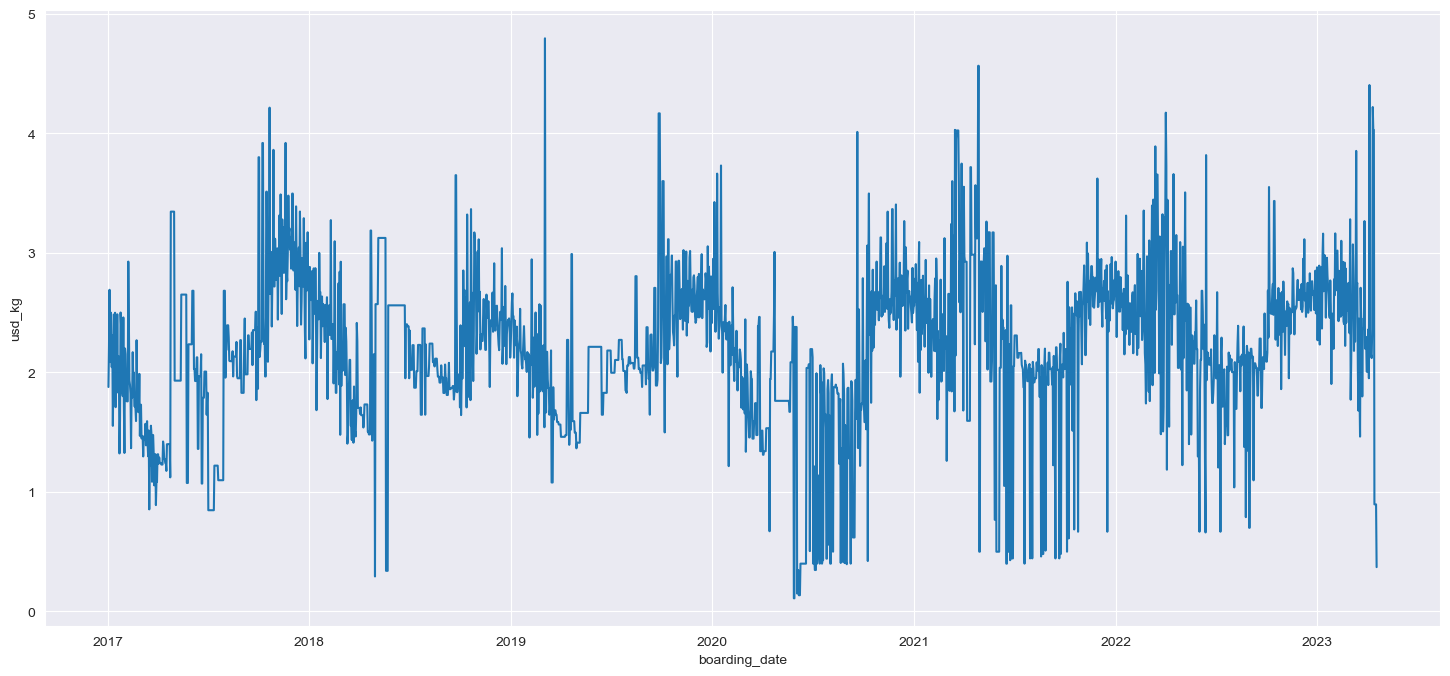

In [11]:
# Plot time series
plt.figure(figsize=(18,8))
sns.lineplot(x="boarding_date", y="usd_kg", data=usd_kg)
plt.show()

In [12]:
# total net weight time series
# Group by boarding_date
net_weight = heading_data[['boarding_date','net_weight']].groupby(by=['boarding_date']).sum().round(3)
# Impute missing dates assigning 0 kg for days without shipments
net_weight.index = pd.to_datetime(net_weight.index)
net_weight = net_weight.resample('D').asfreq()
net_weight.fillna(0.0, inplace=True)
net_weight

,net_weight
boarding_date,
2017-01-02,1002933.700
2017-01-03,3696504.800
2017-01-04,5290304.460
2017-01-05,3915774.800
2017-01-06,9345361.640
...,...
2023-04-15,33096.000
2023-04-16,0.0
2023-04-17,0.0


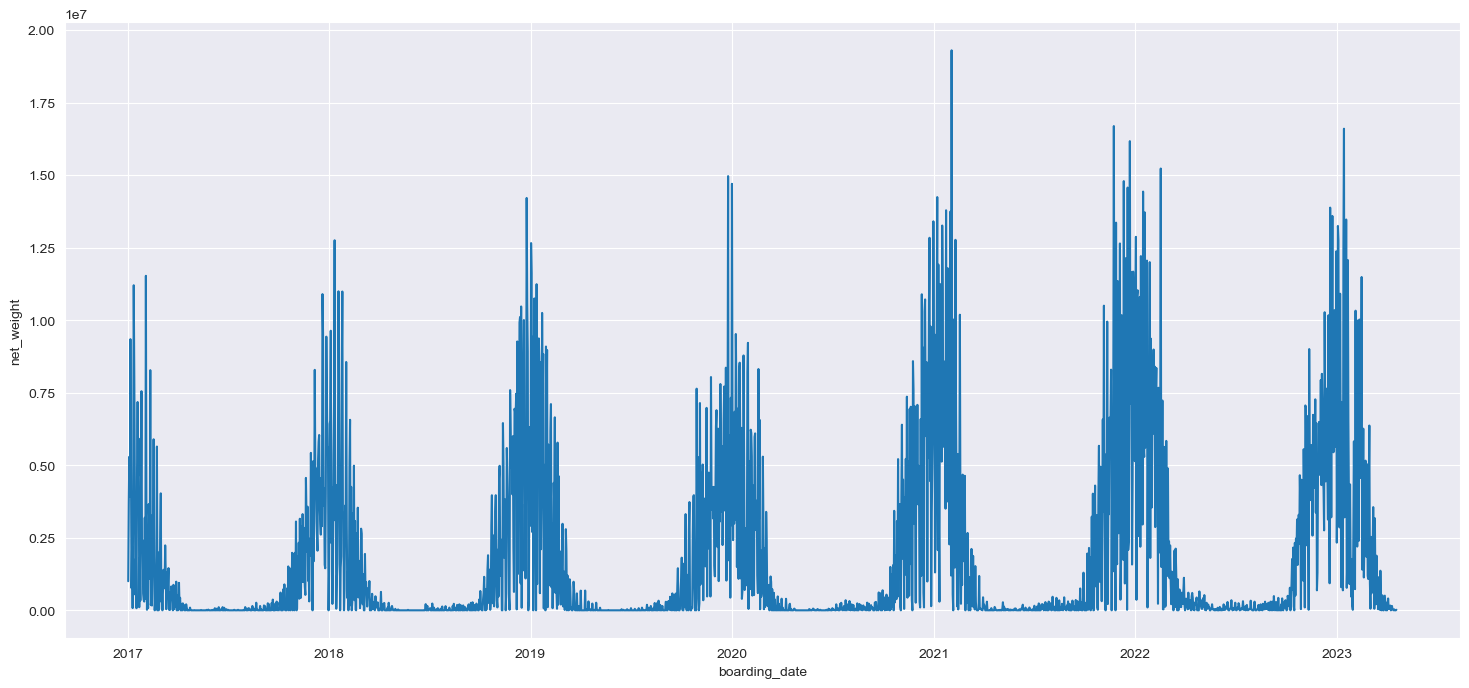

In [13]:
# Plot time series
plt.figure(figsize=(18,8))
sns.lineplot(x="boarding_date", y="net_weight", data=net_weight)
plt.show()

## Plots comparison

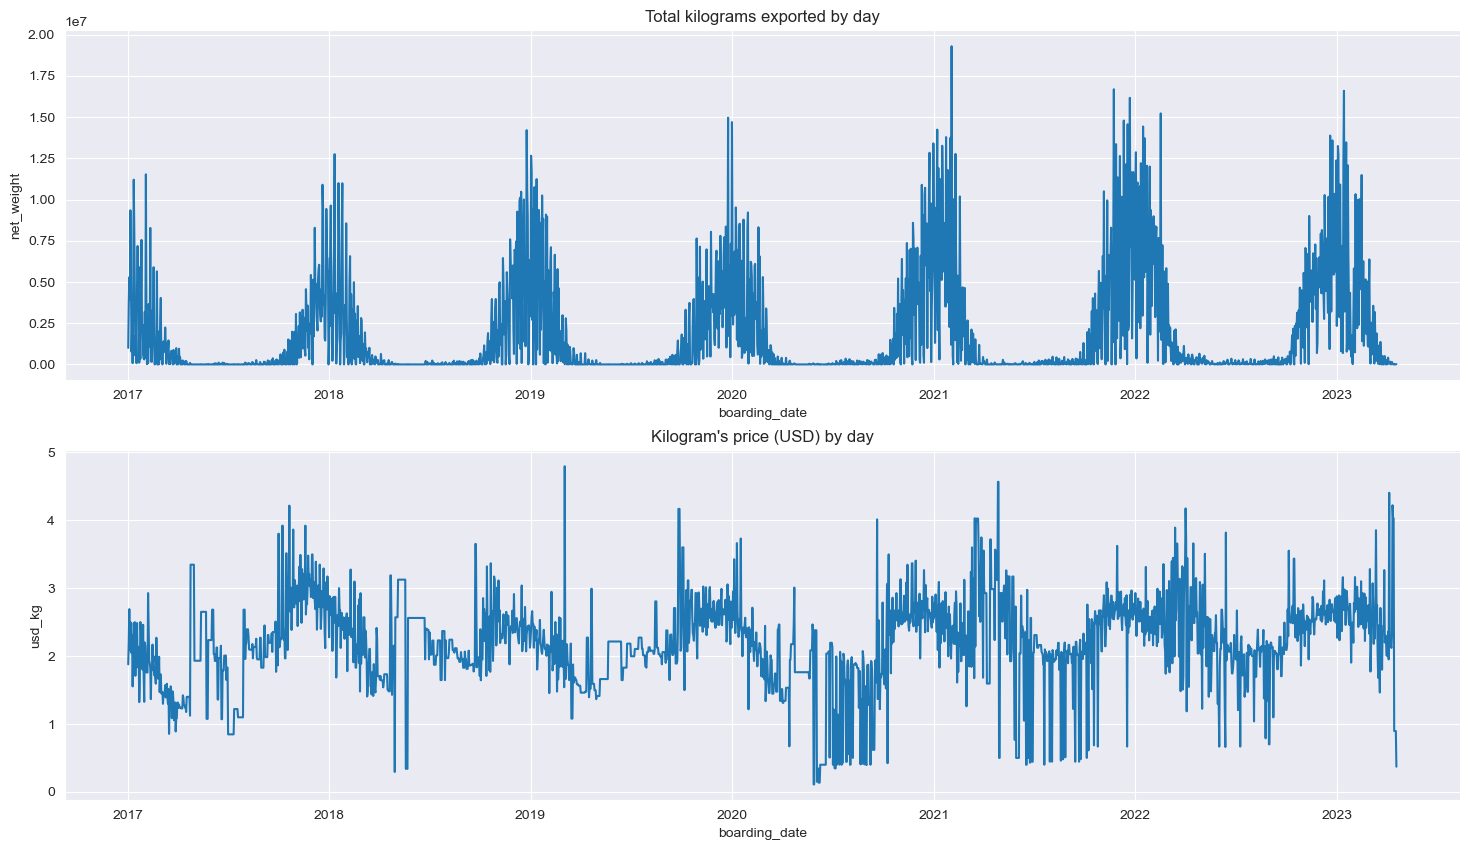

In [14]:
# create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

# plot net_weight on the first subplot
sns.lineplot(x="boarding_date", y="net_weight", data=net_weight, ax=ax1)
ax1.set_title('Total kilograms exported by day')

# plot usd_kg on the second subplot
sns.lineplot(x="boarding_date", y="usd_kg", data=usd_kg, ax=ax2)
ax2.set_title('Kilogram\'s price (USD) by day')

plt.show()